In [1]:
import xarray as xr
import cftime 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import time
import logging
import cartopy.crs as ccrs
import metpy  
import calendar
import argparse
import glob
import geopandas
from geodatasets import get_path
import seaborn as sns

In [2]:
###column names for output agg and non agg

output_col_names = ['lon'
,'lat'
,'variable'
,'ipft'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

output_col_names_cohort = ['lon'
,'lat'
,'variable'
,'cohort_number'
,'stand_age'
,'potential_veg'
,'current_veg'
,'subtype'
,'community_type'
,'silt_clay'  ###check this order
,'lc_state'
,'land_area'
,'cohort_area'
,'year'
,'annual_sum'
,'monthly_maximum'
,'monthly_mean'
,'monthly_minimum'
,'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec'
,'region']

clm_names = ['lon', 'lat','var' ,'Area', 'year', 'sum', 'max', 'average'
         , 'min', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'
         , 'Nov', 'Dec', 'Area_Name']

In [3]:
###path to aggregate for one and two gridcells
agg = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/new_aggregate_test/var_out/GPP.csv0', names = output_col_names)
agg1 = pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/agg2test/var_out_agg/GPP.csv0', names = output_col_names)

# agg['subtype'] = agg['ipft'] + 1

In [18]:

###path to non aggregate for one and two gridcells

# nonagg2 =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/pacific_ensemble/pre_data/BCCxxCSM2xxMR/var_out/VEGC.csv0', names = output_col_names_cohort)

# nonagg =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/ben_code_test_for_agg_compare/var_out/VEGC.csv0', names = output_col_names_cohort)
# nonagg =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/ben_code_test_for_agg_compare/var_out/GPP.csv0', names = output_col_names_cohort)
nonagg =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/ben_code_test_for_agg_compare/var_out/VEGC.csv0', names = output_col_names_cohort)
# nonagg =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/lulcdat_scanning_change_test/var_out/GPP.csv0', names = output_col_names_cohort)
nonagg1 =pd.read_csv('/home/smmrrr/TEM/TEM_Runs/TEM_parallel_run_support_code/4grd-sbatch/agg2test/var_out/VEGC.csv0', names = output_col_names_cohort)


In [12]:
nonagg2

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-124.5,40.0,VEGC,1,3000,9,9,9,5,66.09,...,19429.21,19524.14,19630.78,19697.61,19651.42,19542.88,19436.05,19393.85,19373.44,United_States_of_America
1,-124.5,40.0,VEGC,2,426,9,9,9,5,66.09,...,19424.33,19519.26,19625.92,19692.74,19646.56,19538.00,19431.17,19388.98,19368.57,United_States_of_America
2,-124.5,40.0,VEGC,3,1,51,51,51,18,66.09,...,18.57,19.34,21.09,23.48,25.61,26.56,26.81,25.04,22.84,United_States_of_America
3,-124.5,40.0,VEGC,1,3000,9,9,9,5,66.09,...,19410.11,19504.33,19618.26,19706.61,19673.25,19599.29,19534.78,19507.71,19480.24,United_States_of_America
4,-124.5,40.0,VEGC,2,427,9,9,9,5,66.09,...,19405.26,19499.49,19613.44,19701.78,19668.44,19594.47,19529.95,19502.88,19475.42,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41537,-124.5,51.5,VEGC,1,3000,9,9,9,5,57.34,...,3230.18,3249.30,3299.87,3363.27,3424.66,3423.69,3392.09,3362.93,3330.85,Canada
41538,-124.5,51.5,VEGC,1,3000,9,9,9,5,57.34,...,3223.79,3217.48,3256.62,3300.98,3361.81,3391.54,3378.88,3349.24,3320.30,Canada
41539,-124.5,51.5,VEGC,1,3000,9,9,9,5,57.34,...,3216.60,3225.92,3281.73,3316.01,3367.12,3394.12,3360.16,3327.29,3298.13,Canada
41540,-124.5,51.5,VEGC,1,3000,9,9,9,5,57.34,...,3207.14,3240.47,3294.28,3347.21,3386.78,3370.52,3335.41,3305.37,3277.68,Canada


In [19]:
##look at test grid cell
agg.loc[(agg['lon'] == -124.5) & (agg['lat']== 40.5)]

,lon,lat,variable,ipft,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
729,-124.5,40.5,GPP,8,2983,9,9,9,18,66.09,...,154.70,195.12,244.94,250.70,173.20,38.95,21.50,64.55,54.60,United_States_of_America
730,-124.5,40.5,GPP,49,1,50,50,50,18,66.09,...,2.04,2.53,50.31,74.85,72.93,121.89,20.01,1.40,0.75,United_States_of_America
731,-124.5,40.5,GPP,50,1,51,51,51,18,66.09,...,1.57,3.87,6.28,7.96,8.23,7.29,4.15,2.37,1.50,United_States_of_America
732,-124.5,40.5,GPP,8,2983,9,9,9,18,66.09,...,112.29,202.18,252.85,249.08,168.38,43.56,48.73,62.46,47.01,United_States_of_America
733,-124.5,40.5,GPP,49,2,50,50,50,18,66.09,...,1.56,22.04,44.91,102.06,64.65,44.86,0.00,1.27,0.79,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,-124.5,40.5,GPP,50,162,9,51,51,18,66.09,...,3.63,5.51,11.69,18.85,21.18,18.62,13.60,5.29,3.80,United_States_of_America
1643,-124.5,40.5,GPP,8,2966,9,9,9,18,66.09,...,102.36,198.56,240.24,230.04,152.77,30.36,1.23,21.39,47.82,United_States_of_America
1644,-124.5,40.5,GPP,50,163,9,51,51,18,66.09,...,4.02,8.55,14.64,18.32,18.85,16.35,12.25,6.74,3.94,United_States_of_America
1645,-124.5,40.5,GPP,8,2966,9,9,9,18,66.09,...,130.81,216.94,226.25,239.21,163.51,58.62,23.97,46.94,51.60,United_States_of_America


In [1]:
###look at dataset with the index number to check all months

# agg.loc[729] 

In [2]:
# agg1.loc[3]

In [5]:
nonagg.loc[(nonagg['lon'] == -124.5) & (nonagg['lat']== 40.5)]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
4437,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,154.61,195.01,244.85,250.60,173.15,39.03,21.55,64.51,54.57,United_States_of_America
4438,-124.5,40.5,GPP,2,426,9,9,9,5,66.09,...,154.61,195.01,244.85,250.60,173.15,39.03,21.55,64.51,54.57,United_States_of_America
4439,-124.5,40.5,GPP,3,1,50,50,50,15,66.09,...,2.05,2.53,3.25,3.67,66.06,101.22,23.33,0.80,0.85,United_States_of_America
4440,-124.5,40.5,GPP,4,1,51,51,51,18,66.09,...,1.92,4.08,6.52,8.12,8.25,7.20,4.06,2.30,1.44,United_States_of_America
4441,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,112.23,202.14,252.79,248.95,168.33,43.68,48.77,62.43,46.98,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,-124.5,40.5,GPP,47,23,9,51,51,18,66.09,...,15.36,25.31,29.47,35.10,34.42,28.15,21.83,11.21,7.02,United_States_of_America
11379,-124.5,40.5,GPP,48,20,9,51,51,18,66.09,...,14.26,23.89,27.90,33.34,32.84,27.12,21.22,10.82,6.77,United_States_of_America
11380,-124.5,40.5,GPP,49,17,9,51,51,18,66.09,...,14.01,23.29,27.30,32.68,32.23,26.68,20.94,10.69,6.70,United_States_of_America
11381,-124.5,40.5,GPP,50,14,9,51,51,18,66.09,...,12.38,21.07,24.70,29.60,29.29,24.51,19.47,9.82,6.13,United_States_of_America


In [19]:
nonagg.loc[4437]

lon                                   -124.5
lat                                     40.5
variable                               VEGC 
cohort_number                              1
stand_age                               3000
potential_veg                              9
current_veg                                9
subtype                                    9
community_type                             5
silt_clay                              66.09
lc_state                                   0
land_area                               1562
cohort_area                             1526
year                                    1501
annual_sum                          226058.7
monthly_maximum                      19044.0
monthly_mean                        18838.23
monthly_minimum                      18720.3
Jan                                 18724.88
Feb                                 18720.27
Mar                                 18725.35
Apr                                 18774.39
May       

In [20]:
nonagg1.loc[4]

lon                                   -124.5
lat                                     40.5
variable                               VEGC 
cohort_number                              1
stand_age                               3000
potential_veg                              9
current_veg                                9
subtype                                    9
community_type                             5
silt_clay                              66.09
lc_state                                   0
land_area                               1562
cohort_area                             1526
year                                    1501
annual_sum                          226083.5
monthly_maximum                      19046.1
monthly_mean                         18840.3
monthly_minimum                      18722.3
Jan                                 18726.95
Feb                                 18722.33
Mar                                 18727.42
Apr                                 18776.45
May       

In [ ]:
nonagg.merge(nonagg1, on = [])

In [6]:
nonagg1

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
0,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,132.27,223.91,231.03,244.35,162.36,53.45,20.96,46.45,52.06,United_States_of_America
1,-124.5,40.5,GPP,2,425,9,9,9,5,66.09,...,132.27,223.92,231.03,244.35,162.36,53.44,20.96,46.45,52.06,United_States_of_America
2,-124.5,40.5,GPP,3,0,50,50,50,15,66.09,...,9.47,18.77,31.63,111.17,97.76,67.38,10.60,3.38,0.87,United_States_of_America
3,-124.5,40.5,GPP,4,0,51,51,51,18,66.09,...,1.89,4.61,5.79,7.19,7.33,6.44,5.37,2.54,1.55,United_States_of_America
4,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,154.60,195.01,244.85,250.60,173.15,39.03,21.55,64.51,54.57,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6945,-124.5,40.5,GPP,47,23,9,51,51,18,66.09,...,15.34,25.27,29.43,35.07,34.40,28.14,21.83,11.21,7.02,United_States_of_America
6946,-124.5,40.5,GPP,48,20,9,51,51,18,66.09,...,14.26,23.89,27.90,33.34,32.61,26.96,21.12,10.78,6.75,United_States_of_America
6947,-124.5,40.5,GPP,49,17,9,51,51,18,66.09,...,13.86,23.27,27.26,32.64,32.21,26.68,20.94,10.68,6.69,United_States_of_America
6948,-124.5,40.5,GPP,50,14,9,51,51,18,66.09,...,12.43,20.96,24.42,29.32,29.07,24.38,19.40,9.80,6.13,United_States_of_America


In [18]:
agg.loc[(agg['lon'] == -124.5) & (agg['lat']== 40.5) & (agg['year'] == 1505), 'annual_sum']

741    1487.3
742     311.4
743      24.2
Name: annual_sum, dtype: float64

In [17]:
nonagg.loc[(nonagg['lon'] == -124.5) & (nonagg['lat']== 40.5)& (nonagg['year'] == 1505), 'annual_sum' ]



4453    1488.7
4454    1488.7
4455     313.3
4456      18.9
Name: annual_sum, dtype: float64

In [11]:
nonagg.loc[(nonagg['lon'] == -124.5) & (nonagg['lat']== 40.5) ]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
4437,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,109.33,217.78,235.68,231.05,174.43,51.63,22.05,64.85,54.52,United_States_of_America
4438,-124.5,40.5,GPP,2,426,9,9,9,5,66.09,...,109.33,217.78,235.68,231.05,174.43,51.63,22.05,64.85,54.52,United_States_of_America
4439,-124.5,40.5,GPP,3,1,50,50,50,15,66.09,...,0.00,38.18,54.75,59.58,111.92,67.60,33.55,0.00,0.00,United_States_of_America
4440,-124.5,40.5,GPP,4,1,51,51,51,18,66.09,...,0.00,2.24,2.97,3.68,3.95,3.38,2.49,1.19,0.81,United_States_of_America
4441,-124.5,40.5,GPP,1,3000,9,9,9,5,66.09,...,127.37,209.84,238.02,255.93,200.30,103.36,73.87,67.27,45.00,United_States_of_America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,-124.5,40.5,GPP,47,23,9,51,51,18,66.09,...,2.69,10.56,16.74,23.84,26.06,22.91,16.48,9.87,5.55,United_States_of_America
11379,-124.5,40.5,GPP,48,20,9,51,51,18,66.09,...,2.45,9.95,16.01,22.82,25.18,22.16,15.95,9.48,5.36,United_States_of_America
11380,-124.5,40.5,GPP,49,17,9,51,51,18,66.09,...,2.15,8.62,13.90,19.80,21.70,19.25,14.01,8.21,4.62,United_States_of_America
11381,-124.5,40.5,GPP,50,14,9,51,51,18,66.09,...,1.71,7.09,11.49,16.40,17.94,15.87,11.71,6.80,3.82,United_States_of_America


In [5]:
# nonagg[['lon',  'lat', 'year', 'cohort_number','potential_veg','cohort_area','annual_sum']].drop_duplicates()

In [16]:
###check that one and two grid cells are the same
tt = nonagg[['lon',  'lat', 'year', 'cohort_number','potential_veg','cohort_area','annual_sum']].merge(
    nonagg2[['lon',  'lat', 'year', 'cohort_number','potential_veg','cohort_area','annual_sum']], on = ['lon',  'lat', 'year', 'cohort_number','potential_veg'])

In [17]:
tt.loc[tt['annual_sum_x'] != tt['annual_sum_y']]
# tt

,lon,lat,year,cohort_number,potential_veg,cohort_area_x,annual_sum_x,cohort_area_y,annual_sum_y
0,-124.5,40.0,1501,1,9,1828,224791.6,1828,233911.8
1,-124.5,40.0,1501,2,9,4,224779.4,4,233853.2
2,-124.5,40.0,1501,3,51,12,315.9,12,266.9
3,-124.5,40.0,1502,1,9,1828,224838.0,1828,234112.1
4,-124.5,40.0,1502,2,9,4,224825.9,4,234054.1
...,...,...,...,...,...,...,...,...,...
41537,-124.5,51.5,1846,1,9,1913,52017.6,1913,39921.6
41538,-124.5,51.5,1847,1,9,1913,51597.8,1913,39622.3
41539,-124.5,51.5,1848,1,9,1913,51329.5,1913,39585.1
41540,-124.5,51.5,1849,1,9,1913,50821.8,1913,39501.8


In [12]:
tt

,lon,lat,year,cohort_number,potential_veg,cohort_area_x,annual_sum_x,cohort_area_y,annual_sum_y
0,-124.5,40.0,1501,1,9,1828,233911.8,1828,233911.8
1,-124.5,40.0,1501,2,9,4,233853.2,4,233853.2
2,-124.5,40.0,1501,3,51,12,266.9,12,266.9
3,-124.5,40.0,1502,1,9,1828,234112.1,1828,234112.1
4,-124.5,40.0,1502,2,9,4,234054.1,4,234054.1
...,...,...,...,...,...,...,...,...,...
41537,-124.5,51.5,1846,1,9,1913,39921.6,1913,39921.6
41538,-124.5,51.5,1847,1,9,1913,39622.3,1913,39622.3
41539,-124.5,51.5,1848,1,9,1913,39585.1,1913,39585.1
41540,-124.5,51.5,1849,1,9,1913,39501.8,1913,39501.8


In [7]:
###!!!! post processing aggregation !!!####
### take the weighted average of the non agg version
####get weighted average
nonagg['temp_weight'] = nonagg['annual_sum'] * nonagg['cohort_area'] 


nonagg_sum = nonagg.groupby(
    ['lon','lat','year','subtype']
)[['temp_weight', 'cohort_area']].sum()

# all_grids =  all_grids.reset_index()

nonagg_sum['annual_sum'] = nonagg_sum['temp_weight']/nonagg_sum['cohort_area']
nonagg_sum = nonagg_sum.reset_index()



In [8]:
##adjust subtype to be ipft for merge
nonagg_sum['ipft'] = nonagg_sum['subtype']-1
nonagg_sum

,lon,lat,year,subtype,temp_weight,cohort_area,annual_sum,ipft
0,-124.5,40.5,1500,9,2064076.8,1536,1343.800000,8
1,-124.5,40.5,1500,50,3106.0,10,310.600000,49
2,-124.5,40.5,1500,51,792.4,14,56.600000,50
3,-124.5,40.5,1501,9,2132121.6,1536,1388.100000,8
4,-124.5,40.5,1501,50,2118.0,10,211.800000,49
...,...,...,...,...,...,...,...,...
916,-124.5,40.5,1848,51,6543.9,52,125.844231,50
917,-124.5,40.5,1849,9,2061921.9,1508,1367.322215,8
918,-124.5,40.5,1849,51,7891.3,52,151.755769,50
919,-124.5,40.5,1850,9,2155612.2,1508,1429.451061,8


In [9]:
####compare aggregate tem and non aggregate tem
test = agg[['lon',  'lat', 'year', 'ipft','cohort_area','annual_sum']].merge(
    nonagg_sum, on = ['lon',  'lat', 'year','ipft'])



In [10]:
test

,lon,lat,year,ipft,cohort_area_x,annual_sum_x,subtype,temp_weight,cohort_area_y,annual_sum_y
0,-124.5,40.5,1500,8,1536,1343.8,9,2064076.8,1536,1343.800000
1,-124.5,40.5,1500,49,10,310.6,50,3106.0,10,310.600000
2,-124.5,40.5,1500,50,14,56.6,51,792.4,14,56.600000
3,-124.5,40.5,1501,8,1536,1388.1,9,2132121.6,1536,1388.100000
4,-124.5,40.5,1501,49,10,211.8,50,2118.0,10,211.800000
...,...,...,...,...,...,...,...,...,...,...
916,-124.5,40.5,1848,50,52,125.9,51,6543.9,52,125.844231
917,-124.5,40.5,1849,8,1508,1367.4,9,2061921.9,1508,1367.322215
918,-124.5,40.5,1849,50,52,151.8,51,7891.3,52,151.755769
919,-124.5,40.5,1850,8,1508,1429.6,9,2155612.2,1508,1429.451061


In [11]:
### calc differences
test['diff'] = test['annual_sum_x'] - test['annual_sum_y']

In [12]:
# test.loc[(test['lon'] == -124.5) & (test['lat']== 40.5)
#                   & (test['diff'] > 3)]

test.loc[(test['diff'] > 3)]

,lon,lat,year,ipft,cohort_area_x,annual_sum_x,subtype,temp_weight,cohort_area_y,annual_sum_y,diff


In [13]:
test.loc[(test['lon'] == -124.5) & (test['lat']== 40.5)& (test['year'] == 1850) ]




,lon,lat,year,ipft,cohort_area_x,annual_sum_x,subtype,temp_weight,cohort_area_y,annual_sum_y,diff
1645,-124.5,40.5,1850,8,1508,1249.3,9,1883297.7,1508,1248.871154,0.428846
1646,-124.5,40.5,1850,50,52,76.0,51,3905.4,52,75.103846,0.896154


In [23]:
nonagg.loc[(nonagg['lon'] == -124.5) & (nonagg['lat']== 40.5) & (nonagg['year']<= 1596)].to_csv(
'~/temp.csv', index=False)

In [19]:
test.loc[(test['lon'] == -124.5) & (test['lat']== 40.5) & (test['year']== 1595) ]

,lon,lat,year,ipft,cohort_area_x,annual_sum_x,subtype,temp_weight,cohort_area_y,annual_sum_y
1000,-124.5,40.5,1595,8,1541,1461.4,9,2251952.4,1541,1461.357820
1001,-124.5,40.5,1595,50,19,41.2,51,832.1,19,43.794737


In [30]:
test.loc[(test['lon'] == -124.5) & (test['lat']== 40.5) &(test['diff'] > 5), 'ipft'].unique()

array([50, 49])

In [33]:
test.loc[(test['lon'] == -124.5) & (test['lat']== 40.5) ].to_csv('~/temp.csv', index=False)

In [26]:
test.loc[test['diff'] > 2]['ipft'].value_counts()

50    403
49     53
8       3
Name: ipft, dtype: int64

In [40]:
test.loc[test['diff'] < 2]['ipft'].value_counts()

8     6647
50    3293
49     571
3      350
Name: ipft, dtype: int64

In [19]:
test.loc[test['diff'] > 2]['ipft'].value_counts()

50    403
49     53
8       3
Name: ipft, dtype: int64

In [20]:
test.loc[test['diff'] < 2]['ipft'].value_counts()

8     6647
50    3293
49     571
3      350
Name: ipft, dtype: int64

In [ ]:
#### compare input data to make sure its the same

nirr_all = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/input_files/global_data/climate/pre_data/CanESM5_ssp245_nirr.csv'
                       ,names = clm_names)
grd1 = pd.read_csv('/home/smmrrr/TEM/TEM_toolkit/aggTEM2_test/pre_data_CanESM5_ssp245_nirr.csv'
                  ,names = clm_names)
grdall = pd.read_csv('/group/moniergrp/TEM_Large_Ensemble/input_files/pacific_ensemble/climate/pre_data/CanESM5_ssp245_nirr.csv'
                                       ,names = clm_names)

grdall.loc[(grdall['lon'] == -124.5) & (grdall['lat']== 40.5)]
nirr_all.loc[(nirr_all['lon'] == -124.5) & (nirr_all['lat']== 40.5)]

In [17]:
test.loc[test['diff'] > 2].groupby(['ipft'])['diff']

In [36]:
nonagg.loc[
(nonagg['lon'] == -124.5)
    &(nonagg['lat'] == 40.5)
    &(nonagg['year'] == 1774)
    &(nonagg['subtype'] == 51)
, ['cohort_area', 'annual_sum']]

,cohort_area,annual_sum
8194,1,182.2
8195,14,159.0
8197,1,248.9
8199,1,211.2
8201,1,190.6
8203,1,173.3
8205,1,760.2
8206,1,830.7
8208,1,897.7
8209,1,963.3


In [37]:
nonagg.loc[
(nonagg['lon'] == -124.5)
    &(nonagg['lat'] == 41.5)
    &(nonagg['year'] == 1623)
    &(nonagg['subtype'] == 51)
, ['cohort_area', 'annual_sum']]

,cohort_area,annual_sum
12843,1,283.8
12844,7,213.9
12845,1,1070.6


In [ ]:
test.loc[test['diff'] > 2, 'diff'].max()

In [29]:
agg.loc[agg['year']==1902, ['lon', 'lat', 'year','subtype', 'cohort_area', 'annual_sum', 'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec']]



,lon,lat,year,subtype,cohort_area,annual_sum,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
400,157.0,65.5,1902,4,1269,125.4,-1.24,-0.99,-0.99,-0.94,22.69,44.74,32.96,28.52,6.01,-2.32,-1.66,-1.39
914,157.0,66.0,1902,4,1245,150.8,-1.37,-1.09,-1.09,-1.04,24.98,49.85,50.50,31.09,5.64,-2.94,-2.04,-1.66
1428,157.0,66.5,1902,4,1220,148.7,-1.38,-1.09,-1.09,-1.03,24.74,50.94,48.04,30.74,5.43,-2.92,-2.03,-1.65
1942,157.0,67.0,1902,4,1195,133.9,-1.63,-1.27,-1.25,-1.11,27.05,52.53,34.70,28.01,4.68,-3.54,-2.36,-1.86
2456,157.0,67.5,1902,4,1170,134.7,-1.62,-1.26,-1.24,-1.10,26.80,52.34,36.34,27.68,4.51,-3.51,-2.35,-1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982590,179.5,67.5,1902,2,1169,6.6,-0.10,-0.08,-0.08,-0.07,-0.53,1.93,-0.66,4.60,2.06,-0.20,-0.16,-0.14
983100,179.5,68.0,1902,2,1144,14.7,-0.08,-0.06,-0.05,-0.04,-0.40,5.67,2.25,5.60,2.34,-0.22,-0.17,-0.15
983612,179.5,68.5,1902,2,1119,14.8,-0.09,-0.06,-0.05,-0.04,-0.41,6.21,2.39,5.25,2.17,-0.23,-0.17,-0.15
984125,179.5,70.5,1902,3,224,28.8,-0.09,-0.07,-0.07,-0.07,-0.76,5.24,15.75,10.03,2.31,-2.66,-0.55,-0.22


In [28]:
nonagg.loc[nonagg['year']==1902, ['lon', 'lat', 'year','subtype', 'cohort_area', 'annual_sum', 'Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec']]



,lon,lat,year,subtype,cohort_area,annual_sum,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
401,157.0,65.5,1902,4,1269,132.2,-1.45,-1.15,-1.15,-1.15,20.68,45.56,38.04,29.10,10.50,-3.03,-2.10,-1.70
915,157.0,66.0,1902,4,1245,134.3,-1.47,-1.16,-1.17,-1.16,20.84,46.81,38.93,29.38,10.35,-3.12,-2.15,-1.74
1429,157.0,66.5,1902,4,1220,135.3,-1.48,-1.17,-1.17,-1.16,20.68,47.90,39.40,29.26,10.08,-3.16,-2.17,-1.75
1943,157.0,67.0,1902,4,1195,128.0,-1.46,-1.15,-1.15,-1.03,17.66,48.70,42.44,24.93,5.36,-2.74,-1.95,-1.61
2457,157.0,67.5,1902,4,1170,128.4,-1.47,-1.15,-1.15,-1.03,17.56,48.90,43.08,24.83,5.17,-2.77,-1.96,-1.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11352757,179.5,67.5,1902,2,1169,41.3,-0.38,-0.27,-0.24,-0.19,-0.73,9.55,10.98,18.33,6.10,-0.81,-0.59,-0.48
11353271,179.5,68.0,1902,2,1144,30.3,-0.43,-0.31,-0.29,-0.23,-0.84,5.16,6.45,16.85,5.71,-0.77,-0.57,-0.46
11353785,179.5,68.5,1902,2,1119,36.8,-0.43,-0.31,-0.28,-0.23,-0.84,7.77,9.65,17.67,5.77,-0.83,-0.61,-0.49
11354299,179.5,70.5,1902,3,224,58.4,-0.27,-0.20,-0.20,-0.18,-1.25,14.51,34.90,22.37,-8.37,-1.84,-0.69,-0.37


In [5]:
agg[['annual_sum','Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec']].describe()

,annual_sum,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,6.410000e+02,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000,641.000000
mean,1.035497e+04,408.183167,552.024618,906.532512,687.122184,962.062278,1298.081654,475.643635,1530.573682,2317.828003,544.128674,269.453151,403.340733
std,6.285207e+04,2852.557893,3619.637740,6677.742104,5164.021077,5266.228400,7502.087646,2788.537588,8777.735403,14421.771761,3040.187718,1352.689659,2509.109451
min,-2.810000e+01,-15.830000,-4.210000,-5.300000,-25.940000,-25.070000,-13.070000,-6.350000,-6.710000,-9.710000,-9.130000,-6.830000,-134.330000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.010000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.585000e+02,2.360000,5.230000,14.330000,8.120000,0.080000,0.000000,5.200000,21.180000,35.090000,20.800000,10.290000,6.850000
75%,1.110000e+03,35.250000,45.990000,87.440000,84.320000,106.940000,138.740000,55.660000,160.660000,245.460000,67.750000,37.520000,40.430000
max,1.011064e+06,48400.760000,57497.640000,124324.070000,89211.400000,81264.100000,125045.810000,50189.730000,133438.080000,244217.940000,51192.590000,18917.070000,40934.220000


In [64]:
agg[['annual_sum','Jan'
,'Feb'
,'Mar'
,'Apr'
,'May'
,'Jun'
,'Jul'
,'Aug'
,'Sep'
,'Oct'
,'Nov'
,'Dec']]

,annual_sum,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,143.2,-1.11,-0.91,-0.94,-0.91,18.90,45.83,41.09,32.59,14.08,-2.35,-1.67,-1.39
1,148.2,-1.18,-0.96,-0.98,-0.89,21.88,48.66,44.32,33.63,9.56,-2.53,-1.79,-1.48
2,125.5,-1.25,-1.00,-1.01,-0.91,7.75,45.09,43.60,31.14,8.22,-2.72,-1.86,-1.52
3,109.2,-1.27,-1.01,-1.00,-0.96,8.50,41.55,35.91,26.06,6.81,-2.34,-1.69,-1.40
4,119.5,-1.19,-0.95,-0.95,-0.87,16.62,40.19,36.39,25.66,11.08,-2.97,-1.95,-1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
984737,0.4,-0.07,-0.06,-0.06,-0.72,2.08,1.62,-0.10,-0.88,-1.06,-0.12,-0.10,-0.09
984738,4.0,-0.02,-0.02,-0.02,-0.43,2.49,2.18,0.66,0.20,-0.96,-0.04,-0.03,-0.02
984739,4.4,-0.02,-0.02,-0.02,-0.43,2.73,1.89,0.49,0.18,-0.19,-0.10,-0.06,-0.05
984740,14.6,-0.04,-0.02,-0.02,-0.36,4.15,5.42,4.32,1.92,-0.35,-0.17,-0.12,-0.11


In [35]:
nonagg_sum['year'] = nonagg_sum['year']+1

In [32]:
agg[['lon','lat','year','subtype', 'annual_sum']]

,lon,lat,year,subtype,annual_sum
0,157.0,65.5,1502,4,143.2
1,157.0,65.5,1503,4,148.2
2,157.0,65.5,1504,4,125.5
3,157.0,65.5,1505,4,109.2
4,157.0,65.5,1506,4,119.5
...,...,...,...,...,...
984737,179.5,71.0,2003,2,0.4
984738,179.5,71.0,2012,2,4.0
984739,179.5,71.0,2013,2,4.4
984740,179.5,71.0,2014,2,14.6


In [51]:
###compare the weighted average to agg tem

compare = agg[['lon','lat','year','subtype', 'cohort_area','annual_sum']].merge(nonagg_sum, on = ['lon','lat','year','subtype'], how = 'outer').sort_values(
by = ['lon','lat','year','subtype']).reset_index()

compare['ratio'] = compare['annual_sum_x'] / compare['annual_sum_y']
compare


,index,lon,lat,year,subtype,cohort_area_x,annual_sum_x,temp_weight,cohort_area_y,annual_sum_y,ratio
0,0,157.0,65.5,1502,4,1269.0,143.2,185020.2,1269,145.8,0.982167
1,1,157.0,65.5,1503,4,1269.0,148.2,190857.6,1269,150.4,0.985372
2,2,157.0,65.5,1504,4,1269.0,125.5,162432.0,1269,128.0,0.980469
3,3,157.0,65.5,1505,4,1269.0,109.2,143016.3,1269,112.7,0.968944
4,4,157.0,65.5,1506,4,1269.0,119.5,159005.7,1269,125.3,0.953711
...,...,...,...,...,...,...,...,...,...,...,...
989883,989887,179.5,71.0,2011,2,NaN,NaN,-14497.8,993,-14.6,NaN
989884,984738,179.5,71.0,2012,2,993.0,4.0,-13107.6,993,-13.2,-0.303030
989885,984739,179.5,71.0,2013,2,993.0,4.4,59282.1,993,59.7,0.073702
989886,984740,179.5,71.0,2014,2,993.0,14.6,109230.0,993,110.0,0.132727


In [59]:
compare_dropped = compare.dropna()

In [60]:
# compare_dropped['count_pfts'] = compare_dropped.groupby(['lon', 'lat'])['year'].transform('count')
compare_dropped['count_pfts'] = compare_dropped.groupby(['lon', 'lat','year'])['subtype'].transform('count').copy()

/tmp/ipykernel_3319554/181462078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_dropped['count_pfts'] = compare_dropped.groupby(['lon', 'lat','year'])['subtype'].transform('count').copy()


In [61]:
compare_dropped.loc[compare_dropped['count_pfts'] > 1]

,index,lon,lat,year,subtype,cohort_area_x,annual_sum_x,temp_weight,cohort_area_y,annual_sum_y,ratio,count_pfts
3084,3084,157.0,68.5,1502,3,559.0,83.7,51148.5,559,91.500000,0.914754,2
3085,3085,157.0,68.5,1502,4,559.0,136.1,75688.6,559,135.400000,1.005170,2
3086,3086,157.0,68.5,1503,3,559.0,65.9,38067.9,559,68.100000,0.967695,2
3087,3087,157.0,68.5,1503,4,559.0,158.9,83179.2,559,148.800000,1.067876,2
3088,3088,157.0,68.5,1504,3,559.0,128.1,76638.9,559,137.100000,0.934354,2
...,...,...,...,...,...,...,...,...,...,...,...,...
983715,978596,179.5,-16.5,2014,51,81.0,492.9,64386.2,81,794.891358,0.620085,4
983716,978597,179.5,-16.5,2015,16,1028.0,943.8,1268948.7,1028,1234.385895,0.764591,4
983717,978598,179.5,-16.5,2015,48,4.0,59.8,239.3,4,59.825000,0.999582,4
983718,978599,179.5,-16.5,2015,50,137.0,171.8,24482.1,137,178.701460,0.961380,4


In [82]:
compare_dropped.loc[(np.round(compare_dropped['ratio'], 2) ==1)
                   &(compare_dropped['cohort_number']>1)]

,index,lon,lat,year,subtype,cohort_area_x,annual_sum_x,temp_weight,cohort_area_y,annual_sum_y,ratio,count_pfts,cohort_number,cohort_number_binary
3893,3899,157.0,68.5,1909,4,559.0,129.0,72390.5,559,129.500000,0.996139,2,2,False
4027,4033,157.0,68.5,1976,4,559.0,156.3,87707.1,559,156.900000,0.996176,2,2,False
6154,6166,157.5,-9.0,1502,16,537.0,1324.9,711524.8,537,1324.999628,0.999925,2,3,False
6156,6168,157.5,-9.0,1503,16,537.0,1322.9,710397.3,537,1322.900000,1.000000,2,3,False
6158,6170,157.5,-9.0,1504,16,537.0,1256.1,674525.7,537,1256.100000,1.000000,2,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976461,978578,179.5,-16.5,2010,48,3.0,75.1,224.3,3,74.766667,1.004458,4,147,False
976465,978582,179.5,-16.5,2011,48,3.0,77.4,233.3,3,77.766667,0.995285,4,147,False
976469,978586,179.5,-16.5,2012,48,3.0,80.1,240.2,3,80.066667,1.000416,4,148,False
976473,978590,179.5,-16.5,2013,48,3.0,78.9,236.3,3,78.766667,1.001693,4,150,False


In [84]:
compare_dropped.loc[(np.round(compare_dropped['ratio'], 1) !=1)
                   &(compare_dropped['cohort_number']==1)]

,index,lon,lat,year,subtype,cohort_area_x,annual_sum_x,temp_weight,cohort_area_y,annual_sum_y,ratio,count_pfts,cohort_number,cohort_number_binary
5,5,157.0,65.5,1507,4,1269.0,108.2,149615.1,1269,117.9,0.917727,1,1,True
6,6,157.0,65.5,1508,4,1269.0,115.9,156975.3,1269,123.7,0.936944,1,1,True
7,7,157.0,65.5,1509,4,1269.0,111.6,152026.2,1269,119.8,0.931553,1,1,True
9,9,157.0,65.5,1511,4,1269.0,139.4,188827.2,1269,148.8,0.936828,1,1,True
10,10,157.0,65.5,1512,4,1269.0,135.3,187431.3,1269,147.7,0.916046,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982604,984736,179.5,71.0,2002,2,993.0,1.3,43692.0,993,44.0,0.029545,1,1,True
982605,984737,179.5,71.0,2003,2,993.0,0.4,95526.6,993,96.2,0.004158,1,1,True
982606,984738,179.5,71.0,2012,2,993.0,4.0,-13107.6,993,-13.2,-0.303030,1,1,True
982607,984739,179.5,71.0,2013,2,993.0,4.4,59282.1,993,59.7,0.073702,1,1,True


In [71]:
nonagg.loc[(nonagg['lon'] ==179.5)
          &(nonagg['lat']==68.0)
          &(nonagg['year']==1518)
          ]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region,temp_weight
11352887,179.5,68.0,NPP,1,3000,2,2,2,2,50.98,...,-0.07,11.23,18.62,26.12,16.65,-0.87,-0.74,-0.65,Russia,80194.4


In [74]:
max_cohorts = nonagg.groupby(['lon', 'lat', 'year'])['cohort_number'].max().reset_index()

In [76]:
compare_dropped = compare_dropped.merge(max_cohorts, on = ['lon', 'lat', 'year'])

In [78]:
compare_dropped['cohort_number_binary'] = compare_dropped['cohort_number'] == 1

In [80]:
compare_dropped

,index,lon,lat,year,subtype,cohort_area_x,annual_sum_x,temp_weight,cohort_area_y,annual_sum_y,ratio,count_pfts,cohort_number,cohort_number_binary
0,0,157.0,65.5,1502,4,1269.0,143.2,185020.2,1269,145.8,0.982167,1,1,True
1,1,157.0,65.5,1503,4,1269.0,148.2,190857.6,1269,150.4,0.985372,1,1,True
2,2,157.0,65.5,1504,4,1269.0,125.5,162432.0,1269,128.0,0.980469,1,1,True
3,3,157.0,65.5,1505,4,1269.0,109.2,143016.3,1269,112.7,0.968944,1,1,True
4,4,157.0,65.5,1506,4,1269.0,119.5,159005.7,1269,125.3,0.953711,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982604,984736,179.5,71.0,2002,2,993.0,1.3,43692.0,993,44.0,0.029545,1,1,True
982605,984737,179.5,71.0,2003,2,993.0,0.4,95526.6,993,96.2,0.004158,1,1,True
982606,984738,179.5,71.0,2012,2,993.0,4.0,-13107.6,993,-13.2,-0.303030,1,1,True
982607,984739,179.5,71.0,2013,2,993.0,4.4,59282.1,993,59.7,0.073702,1,1,True


<Axes: xlabel='annual_sum_x', ylabel='annual_sum_y'>

/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/smmrrr/miniconda3/envs/condaforge/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


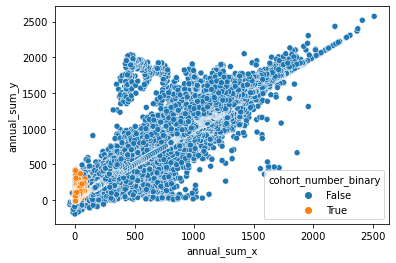

In [81]:
sns.scatterplot(data = compare_dropped, x = 'annual_sum_x', y = 'annual_sum_y', hue = 'cohort_number_binary' )

In [68]:
73677/len(compare_dropped)

0.07481858192298084

<Axes: xlabel='cohort_area_x', ylabel='cohort_area_y'>

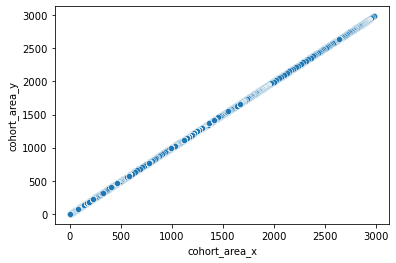

In [63]:
sns.scatterplot(data = compare_dropped, x = 'cohort_area_x', y = 'cohort_area_y' )

In [40]:
### take the weighted average of the non agg version
####get weighted average
nonagg['temp_weight'] = nonagg['annual_sum'] * nonagg['cohort_area'] 


nonagg_year = nonagg.groupby(
    ['year']
)[['temp_weight', 'cohort_area']].sum()

# all_grids =  all_grids.reset_index()

nonagg_year['annual_sum'] = nonagg_year['temp_weight']/nonagg_year['cohort_area']
nonagg_year = nonagg_year.reset_index()


agg['temp_weight'] = agg['annual_sum'] * agg['cohort_area'] 


agg_year = agg.groupby(
    ['year']
)[['temp_weight', 'cohort_area']].sum()

# all_grids =  all_grids.reset_index()

agg_year['annual_sum'] = agg_year['temp_weight']/agg_year['cohort_area']
agg_year = agg_year.reset_index()
nonagg_year['year'] = nonagg_year['year']+1

In [41]:
print(len(agg_year))
print(len(nonagg_year))

514
514


In [46]:
agg_year

,year,temp_weight,cohort_area,annual_sum
0,1502,435774107.3,1555749,280.105664
1,1503,449609466.6,1523348,295.145605
2,1504,435433052.8,1559475,279.217719
3,1505,428501880.7,1566155,273.601196
4,1506,392218907.0,1568421,250.072466
...,...,...,...,...
509,2011,303412525.8,1562106,194.232994
510,2012,306432400.9,1564369,195.882430
511,2013,332116385.4,1575073,210.857773
512,2014,329645525.7,1567144,210.347949


In [49]:
plot

,year,temp_weight,cohort_area,annual_sum,type
0,1502,435774107.3,1555749,280.105664,agg
1,1503,449609466.6,1523348,295.145605,agg
2,1504,435433052.8,1559475,279.217719,agg
3,1505,428501880.7,1566155,273.601196,agg
4,1506,392218907.0,1568421,250.072466,agg
...,...,...,...,...,...
509,2011,396291164.3,1575090,251.599061,nonagg
510,2012,382660305.4,1575090,242.945041,nonagg
511,2013,452672330.0,1575090,287.394581,nonagg
512,2014,450882533.7,1575090,286.258267,nonagg


<Axes: xlabel='year', ylabel='annual_sum'>

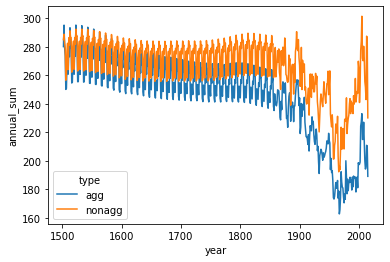

In [50]:
nonagg_year['type'] = 'nonagg'
agg_year['type'] = 'agg'

plot = pd.concat([agg_year,nonagg_year])
plot = plot.reset_index()
sns.lineplot(x = 'year',y = 'annual_sum',hue = 'type', data = plot )

<Axes: xlabel='year', ylabel='ratio'>

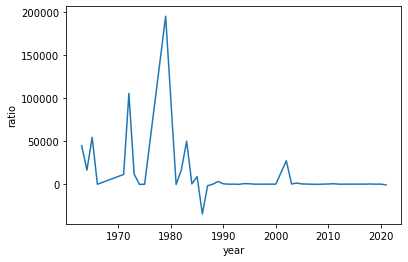

In [44]:
sns.lineplot(x = 'year', y = 'ratio', data = compare_dropped.loc[compare_dropped['subtype'] == 19] )

<Axes: xlabel='year', ylabel='ratio'>

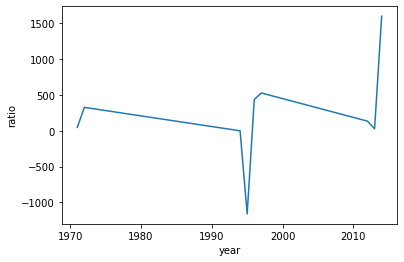

In [45]:
sns.lineplot(x = 'year', y = 'ratio', data = compare_dropped.loc[compare_dropped['subtype'] == 51] )

<Axes: xlabel='year', ylabel='ratio'>

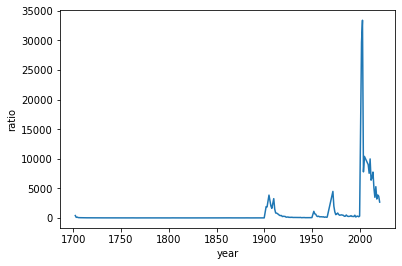

In [42]:
###plot differences over time
sns.lineplot(x = 'year', y = 'ratio', data = compare_dropped.loc[compare_dropped['subtype'] == 50] )

<Axes: xlabel='year', ylabel='ratio'>

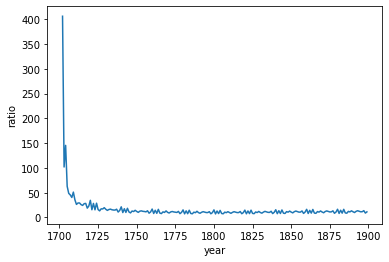

In [43]:
sns.lineplot(x = 'year', y = 'ratio', data = compare_dropped.loc[
    (compare_dropped['subtype'] == 50)
    & (compare_dropped['year'] < 1900)] )

<Axes: xlabel='year', ylabel='annual_sum_x'>

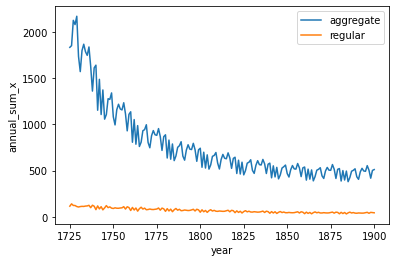

In [52]:
sns.lineplot(x = 'year', y = 'annual_sum_x', label = 'aggregate', data = compare_dropped.loc[
    (compare_dropped['subtype'] == 50)
    & (compare_dropped['year'].between(1725,1900))] )

sns.lineplot(x = 'year', y = 'annual_sum_y', label = 'regular',data = compare_dropped.loc[
    (compare_dropped['subtype'] == 50)
    & (compare_dropped['year'].between(1725,1900))] )

<Axes: xlabel='year', ylabel='annual_sum_y'>

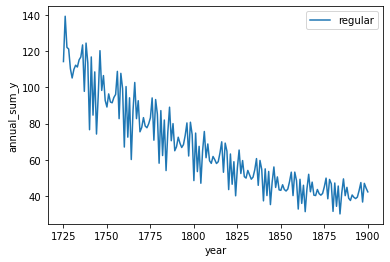

In [53]:

sns.lineplot(x = 'year', y = 'annual_sum_y', label = 'regular',data = compare_dropped.loc[
    (compare_dropped['subtype'] == 50)
    & (compare_dropped['year'].between(1725,1900))] )

<Axes: xlabel='year', ylabel='ratio'>

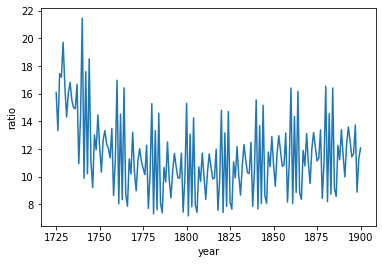

In [47]:
sns.lineplot(x = 'year', y = 'ratio', data = compare_dropped.loc[
    (compare_dropped['subtype'] == 50)
    & (compare_dropped['year'].between(1725,1900))] )

In [50]:
### look at individual year


nonagg.loc[nonagg['year'] == 1800]

nonagg.loc[
    (nonagg['year'] == 1800)
    &(nonagg['annual_sum'] != 0)
          ]

,lon,lat,variable,cohort_number,stand_age,potential_veg,current_veg,subtype,community_type,silt_clay,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
5475,71.5,24.0,NPP,2,100,50,50,50,15,56.81,...,3.71,8.09,13.0,10.3,17.83,20.17,11.58,3.44,0.59,India


In [48]:
agg.loc[agg['year'] == 1800]

,lon,lat,variable,ipft,potential_veg,current_veg,subtype,community_type,silt_clay,lc_state,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,region
178,71.5,24.0,NPP,49,19,50,50,15,56.81,0,...,70.17,64.15,98.22,37.3,94.98,150.32,29.96,15.3,28.48,India
179,71.5,24.0,NPP,50,19,50,51,15,56.81,0,...,-0.00,-0.00,-0.00,-0.0,-0.00,-0.00,-0.00,-0.0,-0.00,India
